In [1]:
import torch
import matplotlib.pyplot as plt

%matplotlib widget

/home/msc5/.local/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:151: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/home/msc5/.local/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:151: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


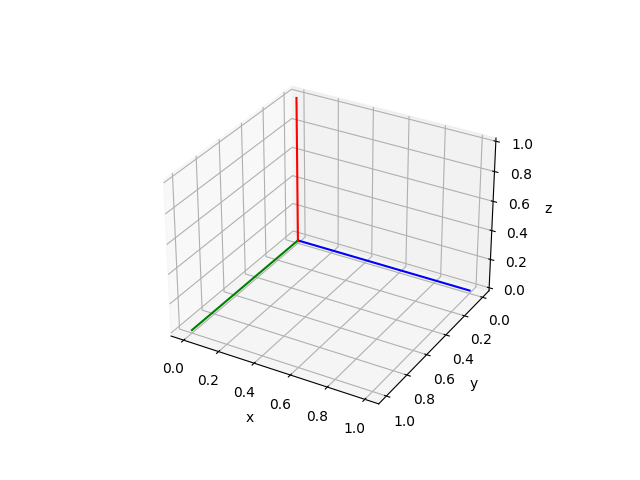

In [2]:
ax = plt.figure().add_subplot(projection='3d')
ax.invert_yaxis()

def axes(ax: plt.Axes, origin: torch.Tensor, basis: torch.Tensor):
    origin = origin[:, None].repeat(1, 3)
    axes = torch.stack([origin, basis], dim=-1)
    ax.plot(*axes[0], color='blue')
    ax.plot(*axes[1], color='green')
    ax.plot(*axes[2], color='red')

axes(ax, torch.zeros(3), torch.eye(3))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

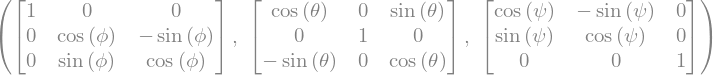

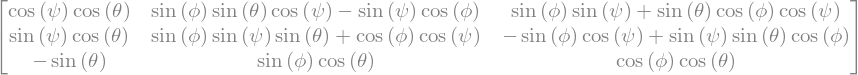

In [7]:
# Euler Angles

import sympy as sp
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting()

def Mx(angle: sp.Symbol):
    return sp.Matrix([[1, 0, 0], [0, sp.cos(angle), -sp.sin(angle)], [0, sp.sin(angle), sp.cos(angle)]])

def My(angle: sp.Symbol):
    return sp.Matrix([[sp.cos(angle), 0, sp.sin(angle)], [0, 1, 0], [-sp.sin(angle), 0, sp.cos(angle)]])

def Mz(angle: sp.Symbol):
    return sp.Matrix([[sp.cos(angle), -sp.sin(angle), 0], [sp.sin(angle), sp.cos(angle), 0], [0, 0, 1]])

phi, theta, psi = dynamicsymbols('phi, theta, psi')
mx = Mx(phi)
my = My(theta)
mz = Mz(psi)
display((mx, my, mz))

# B = Mx(phi) @ My(theta) @ Mz(psi) 
B = mz @ my @ mx
display(B)
# print(sp.latex(B))

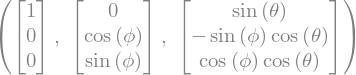

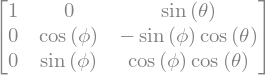

In [6]:

t = sp.symbols('t')
Ox = sp.Matrix([1, 0, 0])
Oy = mx @ sp.Matrix([0, 1, 0])
Oz = mx @ my @ sp.Matrix([0, 0, 1])
display((Ox, Oy, Oz))

W = sp.Matrix.hstack(Ox, Oy, Oz)
display(W)
# print(sp.latex(W))


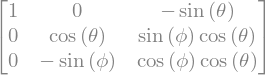

In [69]:
eta = sp.Matrix([phi, theta, psi])
display(eta, W)

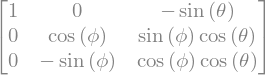

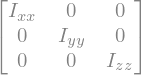

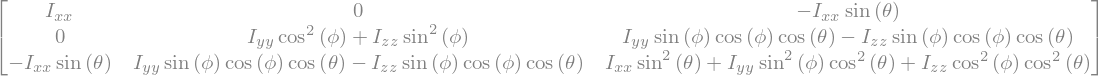

In [150]:
W = sp.Matrix([[1, 0, -sp.sin(theta)], [0, sp.cos(phi), sp.cos(theta) * sp.sin(phi)], [0, -sp.sin(phi), sp.cos(theta) * sp.cos(phi)]])
display(W)
Ixx, Iyy, Izz = sp.symbols('I_xx I_yy I_zz')
I = sp.Matrix([[Ixx, 0, 0], [0, Iyy, 0], [0, 0, Izz]])
J = W.T @ I @ W

display(I, J)

In [170]:
eta.diff(t).T

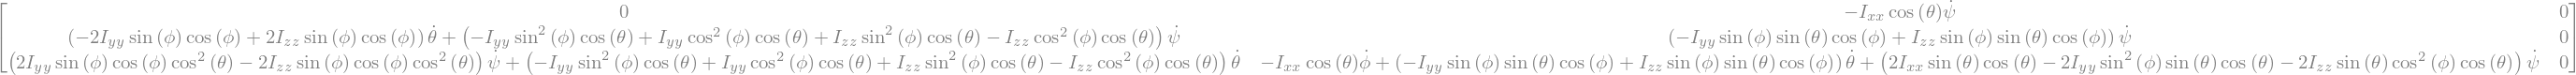

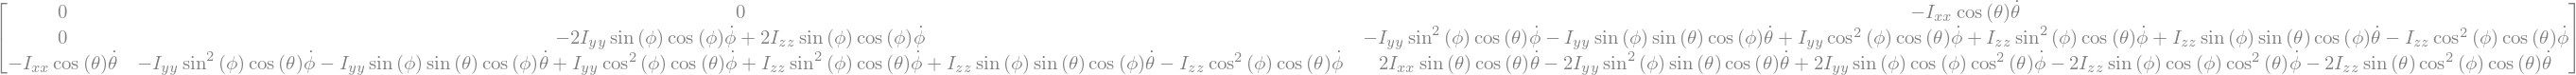

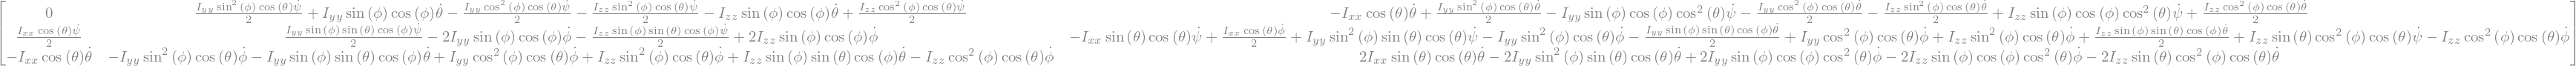

In [166]:
ddeta1 = eta.diff(t).T @ (W.diff(phi).T @ I @ W + W.T @ I @ W.diff(phi))
ddeta2 = eta.diff(t).T @ (W.diff(theta).T @ I @ W + W.T @ I @ W.diff(theta))
ddeta3 = eta.diff(t).T @ (W.diff(psi).T @ I @ W + W.T @ I @ W.diff(psi))
# display(ddeta1, ddeta2, ddeta3)

ddeta = sp.Matrix.vstack(ddeta1, ddeta2, ddeta3).T
display(ddeta)

J_dot = J.diff(t)
display(J_dot)

C = (J_dot - sp.Rational(1, 2) * ddeta.T).applyfunc(sp.cancel)

display(C)

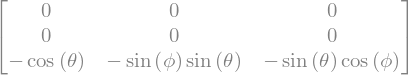

In [161]:
W.diff(eta[1]).T

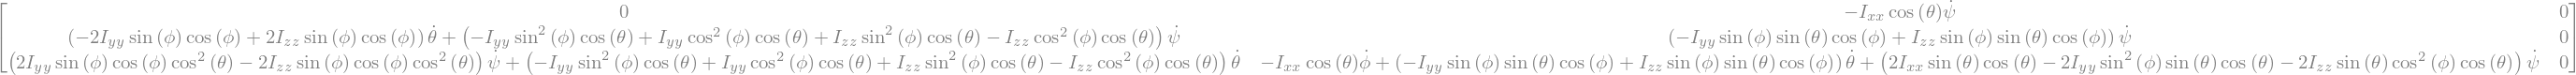

In [169]:
(eta.diff(t).T @ J).jacobian(eta)

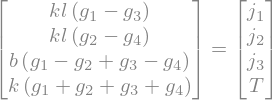

In [199]:
j1, j2, j3 = sp.symbols('j1, j2, j3')
j = sp.Matrix([j1, j2, j3, T])
l, k, b, T, g1, g2, g3, g4 = sp.symbols('l, k, b, T, g1, g2, g3, g4')
tau = sp.Matrix([l * k * (g1 - g3), l * k * (g2 - g4), b * (g1 - g2 + g3 - g4), k * (g1 + g2 + g3 + g4)])
eqn = sp.Eq(tau, j)
eqn

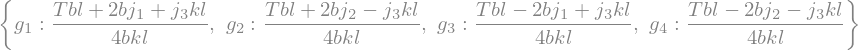

In [200]:
sp.solve(eqn, [g1, g2, g3, g4])